In [ ]:
# Step 1: Install Necessary Libraries (if not already installed)
# Uncomment the following line to install libraries if needed
!pip install pandas numpy scikit-learn imbalanced-learn


In [ ]:
# Step 2: Import Standard Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 3: Load the Dataset from GitHub Repository
url = "https://raw.githubusercontent.com/IndulekhaKP/credit-card-fraud-detection/main/data/creditcard.csv"
data = pd.read_csv(url)
print(f"Dataset shape: {data.shape}")
data.head(100)


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64.0,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
96,64.0,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
97,67.0,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0
98,67.0,-1.494668,0.837241,2.628211,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,...,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0


In [ ]:
# Step 4: Check for Missing Values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


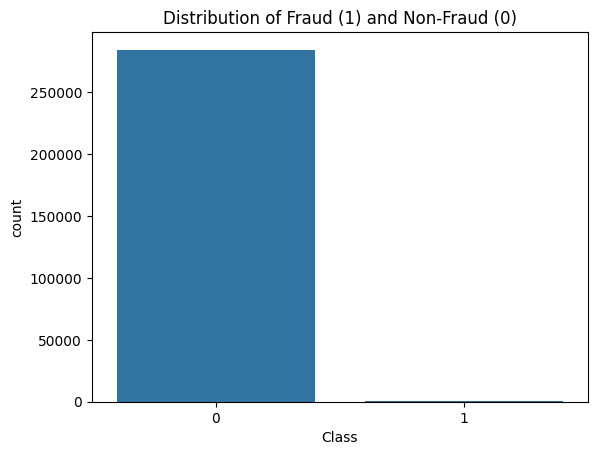

In [ ]:
# Step 5: Visualize the Class Distribution (Fraud and Non-Fraud)
sns.countplot(x='Class', data=data)
plt.title("Distribution of Fraud (1) and Non-Fraud (0)")
plt.show()


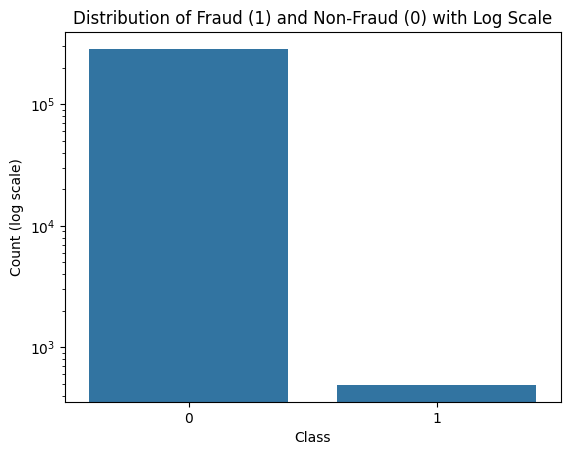

In [ ]:
# Step 6: Visualize the Class Distribution with a Log Scale
sns.countplot(x='Class', data=data)
plt.yscale('log')
plt.title("Distribution of Fraud (1) and Non-Fraud (0) with Log Scale")
plt.ylabel("Count (log scale)")
plt.show()


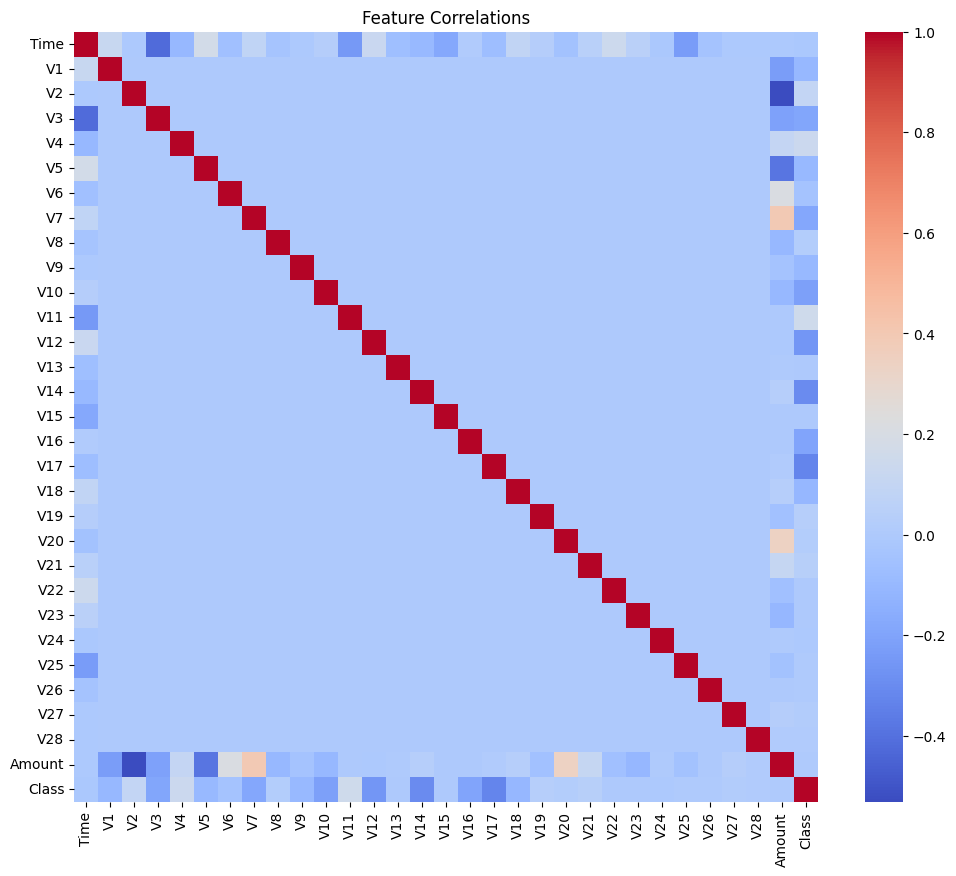

In [ ]:
# Plot Correlation Heatmap to Identify Feature Relationships
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlations")
plt.show()


In [ ]:
# Step 7: Double-Check for Missing Values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Step 8: Define Features (X) and Target Variable (y)
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable (Fraud or Non-Fraud)


In [ ]:
# Step 9: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 10: Scale the Training and Test Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 11: Initialize Logistic Regression with Class Weights
model_logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)


In [ ]:
# Step 12: Train the Logistic Regression Model
model_logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [ ]:
# Step 13: Predict on the Test Data
y_pred = model_logreg.predict(X_test_scaled)


In [ ]:
# Step 14: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[55528  1336]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Accuracy Score:
 0.9764053228468101


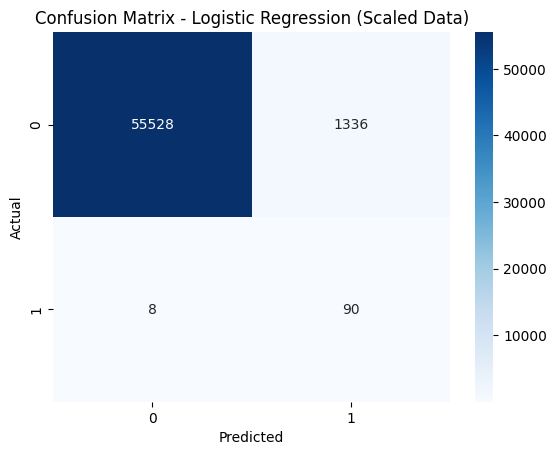

In [ ]:
# Step 15: Generate Plots


# Plot the confusion matrix to visualize model performance
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Scaled Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


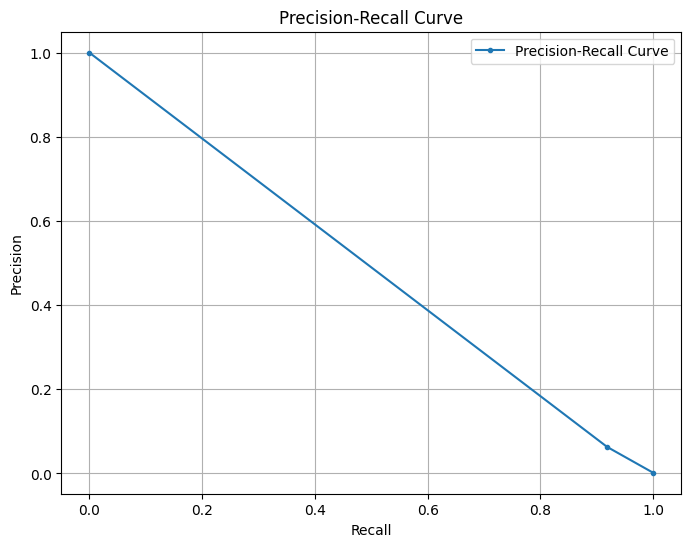

In [ ]:
# Plot Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


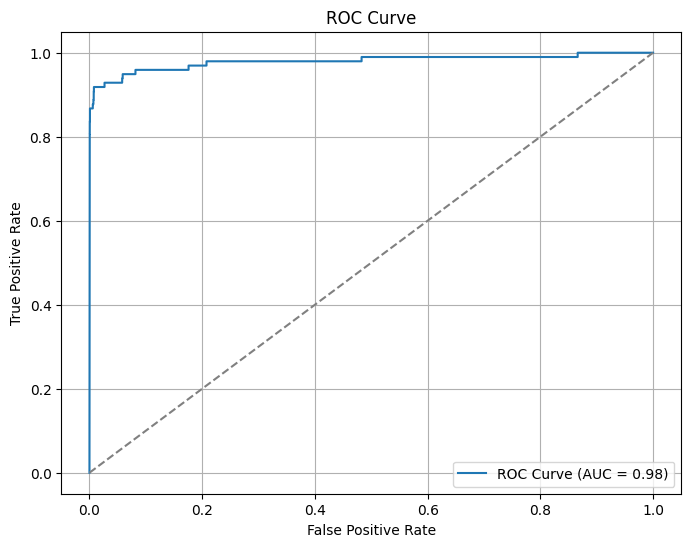

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_prob = model_logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#step 16
# Save the trained model as .pkl locally
import pickle
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model_logreg, file)

print("Model saved locally as 'logistic_model.pkl'.")


Model saved locally as 'logistic_model.pkl'.


In [ ]:
from google.colab import files
files.download("logistic_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>